# Experimento 3: _GridSearch_ no SVM

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC

## Busca em grade

In [2]:
fs20_df = pd.read_csv('./csvs/fs20.csv')
target_s = fs20_df.pop('target')

param_grid_1 = {'svc__C':[0.5, 1, 1.5, 2, 2.5],
        'svc__gamma':['scale', 'auto', 0.01, 0.1, 0.25, 0.5, 1, 1.5]}

results_1 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_1,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_1_df = pd.DataFrame(results_1)
results_1_df.to_csv('./csvs/06-gs_svm-1.csv')
results_1_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.318561,0.021369,0.037462,0.002335,0.5,scale,"{'svc__C': 0.5, 'svc__gamma': 'scale'}",0.826923,0.814672,0.841699,0.822394,0.841699,0.837838,0.799228,0.841699,0.822394,0.861004,0.830955,0.016526,34
1,0.325231,0.023375,0.038646,0.003034,0.5,auto,"{'svc__C': 0.5, 'svc__gamma': 'auto'}",0.826923,0.814672,0.841699,0.822394,0.841699,0.837838,0.799228,0.841699,0.822394,0.861004,0.830955,0.016526,34
2,0.480856,0.026240,0.041982,0.002436,0.5,0.01,"{'svc__C': 0.5, 'svc__gamma': 0.01}",0.565385,0.525097,0.555985,0.536680,0.575290,0.590734,0.505792,0.583012,0.586873,0.559846,0.558469,0.026744,40
3,0.292939,0.025648,0.038601,0.004334,0.5,0.1,"{'svc__C': 0.5, 'svc__gamma': 0.1}",0.853846,0.841699,0.895753,0.857143,0.876448,0.861004,0.818533,0.861004,0.857143,0.891892,0.861446,0.021577,33
4,0.248823,0.020649,0.032587,0.003834,0.5,0.25,"{'svc__C': 0.5, 'svc__gamma': 0.25}",0.903846,0.899614,0.930502,0.876448,0.930502,0.930502,0.880309,0.899614,0.922780,0.969112,0.914323,0.026444,25
5,0.273666,0.018797,0.029013,0.002787,0.5,0.5,"{'svc__C': 0.5, 'svc__gamma': 0.5}",0.942308,0.942085,0.949807,0.949807,0.945946,0.945946,0.934363,0.949807,0.949807,0.984556,0.949443,0.012611,19
6,0.347935,0.029711,0.028353,0.004147,0.5,1,"{'svc__C': 0.5, 'svc__gamma': 1}",0.969231,0.972973,0.957529,0.961390,0.965251,0.969112,0.961390,0.976834,0.961390,0.992278,0.968738,0.009684,16
7,0.415351,0.032144,0.027106,0.002208,0.5,1.5,"{'svc__C': 0.5, 'svc__gamma': 1.5}",0.961538,0.976834,0.961390,0.961390,0.980695,0.969112,0.957529,0.972973,0.969112,0.988417,0.969899,0.009413,15
8,0.264512,0.016006,0.035842,0.001635,1,scale,"{'svc__C': 1, 'svc__gamma': 'scale'}",0.850000,0.891892,0.907336,0.876448,0.876448,0.861004,0.857143,0.868726,0.872587,0.903475,0.876506,0.018189,31
9,0.261992,0.015409,0.034585,0.002299,1,auto,"{'svc__C': 1, 'svc__gamma': 'auto'}",0.850000,0.891892,0.907336,0.876448,0.876448,0.861004,0.857143,0.868726,0.872587,0.903475,0.876506,0.018189,31


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
0.500000,scale,0.830955,0.016526,34
0.500000,auto,0.830955,0.016526,34
0.500000,0.010000,0.558469,0.026744,40
0.500000,0.100000,0.861446,0.021577,33
0.500000,0.250000,0.914323,0.026444,25
0.500000,0.500000,0.949443,0.012611,19
0.500000,1,0.968738,0.009684,16
0.500000,1.500000,0.969899,0.009413,15
1,scale,0.876506,0.018189,31
1,auto,0.876506,0.018189,31


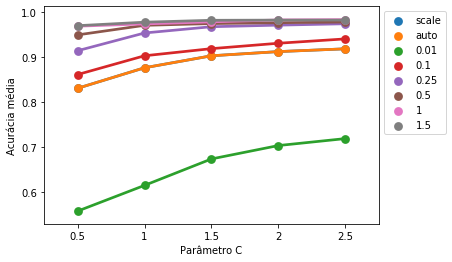

In [3]:
sns.pointplot(
    data=results_1_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_1_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 4: expandindo intervalo da busca em grade

In [4]:
param_grid_2 = {'svc__C':[2, 3, 4, 5, 6],
              'svc__gamma':[0.001, 1, 10, 100, 1000, 10_000, 100_000]}

results_2 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_2,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_2_df = pd.DataFrame(results_2)
results_2_df.to_csv('./csvs/06-gs_svm-2.csv')
results_2_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.596063,0.032107,0.045194,0.003390,2,0.001,"{'svc__C': 2, 'svc__gamma': 0.001}",0.530769,0.559846,0.548263,0.528958,0.559846,0.536680,0.544402,0.544402,0.559846,0.521236,0.543424,0.013197,17
1,0.317446,0.013448,0.019839,0.001255,2,1,"{'svc__C': 2, 'svc__gamma': 1}",0.965385,0.976834,0.976834,0.976834,0.988417,0.969112,0.988417,0.992278,0.984556,0.984556,0.980322,0.008338,5
2,1.053831,0.033508,0.037965,0.003819,2,10,"{'svc__C': 2, 'svc__gamma': 10}",0.942308,0.969112,0.969112,0.953668,0.961390,0.961390,0.965251,0.972973,0.976834,0.972973,0.964501,0.009839,9
3,1.165468,0.052694,0.058356,0.005382,2,100,"{'svc__C': 2, 'svc__gamma': 100}",0.715385,0.787645,0.737452,0.764479,0.725869,0.776062,0.787645,0.729730,0.764479,0.729730,0.751847,0.025804,14
4,1.118210,0.048304,0.052381,0.003938,2,1000,"{'svc__C': 2, 'svc__gamma': 1000}",0.257692,0.247104,0.227799,0.277992,0.220077,0.227799,0.247104,0.223938,0.243243,0.231660,0.240441,0.016994,21
5,1.167142,0.074115,0.059027,0.015687,2,10000,"{'svc__C': 2, 'svc__gamma': 10000}",0.196154,0.193050,0.196911,0.185328,0.196911,0.189189,0.177606,0.185328,0.208494,0.193050,0.192202,0.008022,31
6,1.109089,0.061959,0.052314,0.004326,2,100000,"{'svc__C': 2, 'svc__gamma': 100000}",0.196154,0.193050,0.196911,0.185328,0.196911,0.204633,0.177606,0.185328,0.208494,0.193050,0.193747,0.008747,26
7,0.520352,0.019573,0.042845,0.003152,3,0.001,"{'svc__C': 3, 'svc__gamma': 0.001}",0.530769,0.525097,0.509653,0.521236,0.521236,0.471042,0.548263,0.536680,0.548263,0.544402,0.525664,0.021907,20
8,0.318396,0.018613,0.020306,0.002218,3,1,"{'svc__C': 3, 'svc__gamma': 1}",0.976923,0.980695,0.980695,0.980695,0.988417,0.984556,0.988417,1.000000,0.992278,0.980695,0.985337,0.006631,3
9,1.052924,0.069769,0.036077,0.001983,3,10,"{'svc__C': 3, 'svc__gamma': 10}",0.942308,0.969112,0.965251,0.953668,0.961390,0.961390,0.965251,0.972973,0.976834,0.969112,0.963729,0.009438,10


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
2,0.001000,0.543424,0.013197,17
2,1,0.980322,0.008338,5
2,10,0.964501,0.009839,9
2,100,0.751847,0.025804,14
2,1000,0.240441,0.016994,21
2,10000,0.192202,0.008022,31
2,100000,0.193747,0.008747,26
3,0.001000,0.525664,0.021907,20
3,1,0.985337,0.006631,3
3,10,0.963729,0.009438,10


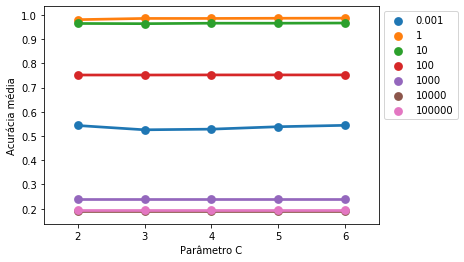

In [5]:
sns.pointplot(
    data=results_2_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_2_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

# Experimento 5: Restringindo intervalos

No experimento 4, nota-se que os melhores desempenhos ocorrem com `gamma` entre 1 (mais próximo deste) e 10 e também com os maiores valores de `C`.

In [12]:
param_grid_3 = {'svc__C':np.arange(6, 12),
                'svc__gamma':np.arange(1, 10)}

results_3 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(cache_size=500)),
    param_grid=param_grid_3,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_3_df = pd.DataFrame(results_3)
results_3_df.to_csv('./csvs/06-gs_svm-3.csv')
results_3_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,param_svc__gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.332176,0.024851,0.019872,0.003459,6,1,"{'svc__C': 6, 'svc__gamma': 1}",0.992308,0.988417,0.980695,0.984556,0.984556,0.980695,0.992278,0.984556,0.976834,0.988417,0.985331,0.004827,8
1,0.472953,0.043056,0.025716,0.011822,6,2,"{'svc__C': 6, 'svc__gamma': 2}",0.984615,0.980695,0.984556,0.984556,0.980695,0.984556,0.988417,0.984556,0.980695,0.988417,0.984176,0.002704,14
2,0.754930,0.138839,0.027649,0.006726,6,3,"{'svc__C': 6, 'svc__gamma': 3}",0.988462,0.980695,0.988417,0.988417,0.976834,0.984556,0.988417,0.984556,0.980695,0.992278,0.985333,0.004506,5
3,0.813299,0.117005,0.030884,0.007002,6,4,"{'svc__C': 6, 'svc__gamma': 4}",0.984615,0.980695,0.984556,0.988417,0.976834,0.980695,0.984556,0.988417,0.976834,0.992278,0.983790,0.004823,19
4,0.976494,0.138075,0.031289,0.006878,6,5,"{'svc__C': 6, 'svc__gamma': 5}",0.984615,0.980695,0.984556,0.980695,0.984556,0.980695,0.980695,0.980695,0.976834,0.984556,0.981859,0.002479,29
5,1.075142,0.163155,0.031597,0.004204,6,6,"{'svc__C': 6, 'svc__gamma': 6}",0.984615,0.980695,0.984556,0.980695,0.976834,0.980695,0.980695,0.972973,0.976834,0.980695,0.979929,0.003374,36
6,1.155968,0.120163,0.036207,0.005341,6,7,"{'svc__C': 6, 'svc__gamma': 7}",0.988462,0.976834,0.980695,0.976834,0.969112,0.976834,0.972973,0.980695,0.976834,0.976834,0.977611,0.004832,41
7,1.229307,0.146299,0.045657,0.012650,6,8,"{'svc__C': 6, 'svc__gamma': 8}",0.984615,0.969112,0.984556,0.976834,0.965251,0.976834,0.965251,0.980695,0.969112,0.980695,0.975296,0.007169,46
8,1.161398,0.149878,0.038254,0.004288,6,9,"{'svc__C': 6, 'svc__gamma': 9}",0.984615,0.969112,0.984556,0.976834,0.957529,0.976834,0.965251,0.969112,0.969112,0.976834,0.972979,0.008107,54
9,0.386200,0.068705,0.023527,0.005493,7,1,"{'svc__C': 7, 'svc__gamma': 1}",0.992308,0.988417,0.980695,0.984556,0.984556,0.980695,0.992278,0.984556,0.976834,0.988417,0.985331,0.004827,8


param_svc__C,param_svc__gamma,mean_test_score,std_test_score,rank_test_score
6,1,0.985331,0.004827,8
6,2,0.984176,0.002704,14
6,3,0.985333,0.004506,5
6,4,0.983790,0.004823,19
6,5,0.981859,0.002479,29
6,6,0.979929,0.003374,36
6,7,0.977611,0.004832,41
6,8,0.975296,0.007169,46
6,9,0.972979,0.008107,54
7,1,0.985331,0.004827,8


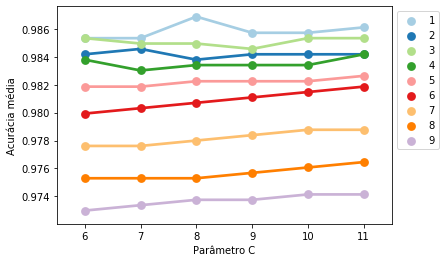

In [13]:
sns.pointplot(
    data=results_3_df,
    x='param_svc__C',
    y='mean_test_score',
    hue='param_svc__gamma',
    palette='Paired'
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

plt.legend(bbox_to_anchor=(1, 1))

results_3_df[[
    'param_svc__C',
    'param_svc__gamma',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])

In [14]:
param_grid_4 = {'svc__C':np.arange(10, 30)}

results_4 = GridSearchCV(
    estimator=make_pipeline(StandardScaler(),
                            SVC(gamma=1, cache_size=500)),
    param_grid=param_grid_4,
    n_jobs=-1,
    cv=StratifiedKFold(n_splits=10,
                       shuffle=True)
    ).fit(
        X=fs20_df.values,
        y=target_s.values
        ).cv_results_

results_4_df = pd.DataFrame(results_4)
results_4_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svc__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.372539,0.036449,0.020884,0.004101,10,{'svc__C': 10},0.976923,0.988417,0.992278,0.980695,0.984556,0.988417,0.988417,0.984556,0.984556,0.992278,0.986109,0.004615,20
1,0.382805,0.055619,0.023315,0.005686,11,{'svc__C': 11},0.976923,0.988417,0.992278,0.980695,0.984556,0.988417,0.988417,0.984556,0.984556,0.996139,0.986495,0.005235,17
2,0.390200,0.085964,0.023946,0.006141,12,{'svc__C': 12},0.976923,0.988417,0.992278,0.984556,0.984556,0.988417,0.988417,0.984556,0.984556,0.996139,0.986881,0.004926,15
3,0.370583,0.045810,0.022364,0.005105,13,{'svc__C': 13},0.976923,0.988417,0.992278,0.984556,0.984556,0.988417,0.988417,0.984556,0.984556,1.000000,0.987268,0.005724,10
4,0.387390,0.056704,0.020407,0.003808,14,{'svc__C': 14},0.976923,0.992278,0.992278,0.984556,0.984556,0.988417,0.988417,0.984556,0.984556,1.000000,0.987654,0.005915,5
5,0.369421,0.065129,0.021603,0.005839,15,{'svc__C': 15},0.976923,0.992278,0.992278,0.984556,0.984556,0.988417,0.988417,0.984556,0.984556,1.000000,0.987654,0.005915,5
6,0.382195,0.075716,0.022429,0.009232,16,{'svc__C': 16},0.976923,0.992278,0.992278,0.984556,0.984556,0.988417,0.988417,0.984556,0.984556,1.000000,0.987654,0.005915,5
7,0.384448,0.053292,0.020449,0.002816,17,{'svc__C': 17},0.976923,0.988417,0.992278,0.980695,0.984556,0.988417,0.988417,0.984556,0.984556,1.000000,0.986881,0.006016,14
8,0.376660,0.034362,0.021133,0.001597,18,{'svc__C': 18},0.976923,0.988417,0.992278,0.980695,0.984556,0.984556,0.988417,0.984556,0.984556,1.000000,0.986495,0.006029,17
9,0.367740,0.047689,0.021103,0.002750,19,{'svc__C': 19},0.976923,0.988417,0.992278,0.980695,0.984556,0.984556,0.988417,0.984556,0.984556,1.000000,0.986495,0.006029,17


param_svc__C,mean_test_score,std_test_score,rank_test_score
10,0.985330,0.006417,15
11,0.984944,0.006789,20
12,0.985330,0.006645,15
13,0.985330,0.006645,15
14,0.985330,0.006645,15
15,0.985330,0.006645,15
16,0.985716,0.006701,12
17,0.985716,0.006701,12
18,0.986102,0.006509,10
19,0.986102,0.006509,10


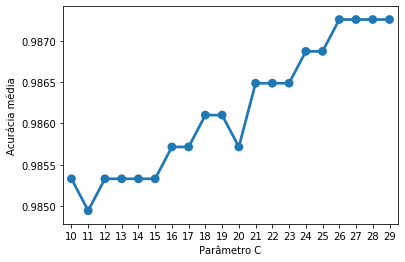

In [9]:
sns.pointplot(
    data=results_4_df,
    x='param_svc__C',
    y='mean_test_score',
    ).set(
        xlabel='Parâmetro C',
        ylabel='Acurácia média')

results_4_df[[
    'param_svc__C',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
    ]].style.hide_index().background_gradient(cmap='Blues_r', subset=['rank_test_score'])